In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as sns
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [198]:
placedf = pd.read_csv('Top Indian Places to Visit.csv')
placedf

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,Western,Gujarat,Gandhinagar,Akshardham,Temple,1992,3.0,4.6,0,Yes,Monday,Religious,No,0.18,All
321,321,Central,Uttar Pradesh,Agra,Agra Fort,Fort,1565,2.0,4.5,40,Yes,NaN,Historical,Yes,1.30,Afternoon
322,322,Central,Madhya Pradesh,Bhopal,Madhya Pradesh Tribal Museum,Museum,2013,2.0,4.7,10,Yes,Monday,Cultural,Yes,0.15,All
323,323,Northern,Rajasthan,Jaipur,City Palace,Palace,1727,2.0,4.4,200,Yes,NaN,Historical,Yes,0.51,Morning


In [199]:
col = ['Type','Google review rating','Number of google review in lakhs','Entrance Fee in INR']
placedf = placedf[col]
placedf

,Type,Google review rating,Number of google review in lakhs,Entrance Fee in INR
0,War Memorial,4.6,2.60,0
1,Tomb,4.5,0.40,30
2,Temple,4.6,0.40,60
3,Theme Park,4.1,0.27,50
4,Observatory,4.2,0.31,15
...,...,...,...,...
320,Temple,4.6,0.18,0
321,Fort,4.5,1.30,40
322,Museum,4.7,0.15,10
323,Palace,4.4,0.51,200


In [200]:
placedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Type                              325 non-null    object 
 1   Google review rating              325 non-null    float64
 2   Number of google review in lakhs  325 non-null    float64
 3   Entrance Fee in INR               325 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 10.3+ KB


In [201]:
placedf.describe()

,Google review rating,Number of google review in lakhs,Entrance Fee in INR
count,325.000000,325.000000,325.000000
mean,4.486154,0.408438,115.809231
std,0.274580,0.646668,530.859785
min,1.400000,0.010000,0.000000
25%,4.400000,0.059000,0.000000
50%,4.500000,0.170000,0.000000
75%,4.600000,0.500000,40.000000
max,4.900000,7.400000,7500.000000


In [202]:
placedf.isna().sum()

Type                                0
Google review rating                0
Number of google review in lakhs    0
Entrance Fee in INR                 0
dtype: int64

In [203]:
placedf = placedf[placedf['Entrance Fee in INR']!=0]
placedf

,Type,Google review rating,Number of google review in lakhs,Entrance Fee in INR
1,Tomb,4.5,0.40,30
2,Temple,4.6,0.40,60
3,Theme Park,4.1,0.27,50
4,Observatory,4.2,0.31,15
7,Fort,4.5,1.50,35
...,...,...,...,...
318,Museum,4.4,0.24,50
321,Fort,4.5,1.30,40
322,Museum,4.7,0.15,10
323,Palace,4.4,0.51,200


In [204]:
placedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 1 to 324
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Type                              142 non-null    object 
 1   Google review rating              142 non-null    float64
 2   Number of google review in lakhs  142 non-null    float64
 3   Entrance Fee in INR               142 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 5.5+ KB


In [205]:
placedf.describe()

,Google review rating,Number of google review in lakhs,Entrance Fee in INR
count,142.000000,142.000000,142.000000
mean,4.421127,0.442229,265.056338
std,0.328511,0.765387,779.569628
min,1.400000,0.010000,5.000000
25%,4.400000,0.082500,20.000000
50%,4.500000,0.215000,50.000000
75%,4.600000,0.507500,150.000000
max,4.900000,7.400000,7500.000000


In [206]:
placedf['Type'].unique()

array(['Tomb', 'Temple', 'Theme Park', 'Observatory', 'Fort', 'Park',
       'Museum', 'Zoo', 'Monument', 'Science', 'National Park',
       'Amusement Park', 'Palace', 'Botanical Garden', 'Landmark',
       'Film Studio', 'Tombs', 'Cricket Ground', 'Waterfall',
       'Bird Sanctuary', 'Cultural', 'Lake', 'Wildlife Sanctuary',
       'Sculpture Garden', 'Cave', 'Mausoleum', 'Vineyard', 'Valley',
       'Temples', 'Site', 'Prehistoric Site', 'Adventure Sport',
       'Ski Resort', 'Orchard', 'Monastery', 'Memorial', 'Aquarium',
       'Hill', 'Religious Complex', 'Rock Carvings', 'Beach',
       'Natural Feature', 'Entertainment', 'Race Track'], dtype=object)

In [207]:
placedf['Type'].value_counts()

Type
Fort                  17
National Park         14
Palace                11
Museum                10
Zoo                    7
Monument               7
Cave                   7
Wildlife Sanctuary     6
Monastery              5
Bird Sanctuary         4
Waterfall              4
Amusement Park         4
Park                   4
Temple                 4
Science                3
Lake                   3
Valley                 2
Landmark               2
Mausoleum              2
Cultural               2
Aquarium               1
Memorial               1
Orchard                1
Rock Carvings          1
Hill                   1
Religious Complex      1
Adventure Sport        1
Beach                  1
Natural Feature        1
Entertainment          1
Ski Resort             1
Tomb                   1
Prehistoric Site       1
Site                   1
Temples                1
Vineyard               1
Sculpture Garden       1
Cricket Ground         1
Tombs                  1
Film Studio         

In [208]:
placedf = pd.get_dummies(placedf,dtype='int')

In [209]:
X = placedf.drop(columns = ['Entrance Fee in INR'])
Y = placedf['Entrance Fee in INR']

In [210]:
X

,Google review rating,Number of google review in lakhs,Type_Adventure Sport,Type_Amusement Park,Type_Aquarium,Type_Beach,Type_Bird Sanctuary,Type_Botanical Garden,Type_Cave,Type_Cricket Ground,...,Type_Temple,Type_Temples,Type_Theme Park,Type_Tomb,Type_Tombs,Type_Valley,Type_Vineyard,Type_Waterfall,Type_Wildlife Sanctuary,Type_Zoo
1,4.5,0.40,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.6,0.40,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.1,0.27,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.2,0.31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.5,1.50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,4.4,0.24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,4.5,1.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,4.7,0.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,4.4,0.51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
Y

1       30
2       60
3       50
4       15
7       35
      ... 
318     50
321     40
322     10
323    200
324    200
Name: Entrance Fee in INR, Length: 142, dtype: int64

In [212]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [213]:
X_train.shape

(120, 46)

In [214]:
Y_train.shape

(120,)

In [215]:
X_test.shape

(22, 46)

In [216]:
Y_test.shape

(22,)

In [217]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [218]:
model.score(X_train,Y_train)

0.503428338238727

In [231]:
Linear_accuracy = model.score(X_test,Y_test)
print(Linear_accuracy)

-1.3776864125691114e+25


In [220]:
model_las = Lasso(alpha = 0.1,max_iter = 1,tol = 0.001)
model_las.fit(X_train,Y_train)

C:\Users\Clarina Jones\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.970e+07, tolerance: 7.835e+04
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=1, tol=0.001)

In [221]:
model_las.score(X_train,Y_train)

0.496904422414868

In [232]:
Lasso_accuracy = model_las.score(X_test,Y_test)
print(Lasso_accuracy)

-0.5750119540837513


In [223]:
model_rid = Ridge(alpha = 0.1,max_iter = 1,tol = 0.001)
model_rid.fit(X_train,Y_train)

Ridge(alpha=0.1, max_iter=1, tol=0.001)

In [224]:
model_rid.score(X_train,Y_train)

0.5018190912691392

In [233]:
Ridge_accuracy = model_rid.score(X_test,Y_test)
print(Ridge_accuracy)

0.051792265012206906


In [226]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [227]:
model.score(X_train,Y_train)

0.503428338238727

In [234]:
Decision_tree_accuracy = model.score(X_test,Y_test)
print(Decision_tree_accuracy)

-1.3776864125691114e+25


In [229]:
 import matplotlib.pyplot as plt

In [235]:
models = ['Linear Regression','Lasso','Ridge','Decision Tree Classifier']
accuracy_scores = [Linear_accuracy,Lasso_accuracy,Ridge_accuracy,Decision_tree_accuracy]

C:\Users\Clarina Jones\AppData\Local\Temp\ipykernel_50100\3881436827.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0,0)


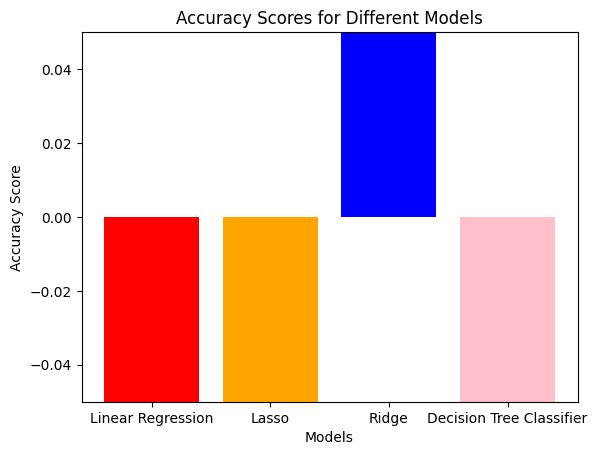

In [247]:
plt.bar(models, accuracy_scores, color=['red', 'orange', 'blue','pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0,0)  
plt.show()